In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

## To split datasets in training and testing 
from sklearn.model_selection import train_test_split

## To Treat Categorial variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## To standardize the variables
from sklearn.preprocessing import StandardScaler




In [2]:
features=pd.read_csv("features.csv")
stores=pd.read_csv('stores.csv')
sampleSubmission=pd.read_csv('sampleSubmission.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [3]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
stores.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

## so we have total 45 stores of 3 types:  A - 22   B - 17  C - 6


In [8]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
train.ix[train.Date=='2010-02-05']

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
143,1,2,2010-02-05,50605.27,False
286,1,3,2010-02-05,13740.12,False
429,1,4,2010-02-05,39954.04,False
572,1,5,2010-02-05,32229.38,False
...,...,...,...,...,...
420727,45,92,2010-02-05,68203.08,False
420870,45,93,2010-02-05,4002.34,False
421147,45,95,2010-02-05,63833.63,False
421292,45,97,2010-02-05,8393.22,False


##### list of count of departments in each store

In [10]:
train.groupby('Store')['Dept'].nunique()

Store
1     77
2     78
3     72
4     78
5     72
6     77
7     76
8     76
9     73
10    77
11    78
12    75
13    79
14    77
15    79
16    76
17    76
18    78
19    79
20    78
21    77
22    76
23    77
24    77
25    77
26    76
27    78
28    77
29    77
30    64
31    76
32    77
33    63
34    78
35    74
36    63
37    62
38    63
39    75
40    77
41    77
42    62
43    61
44    62
45    74
Name: Dept, dtype: int64

### merging features and store dataframes

In [11]:
data=pd.merge(features,stores,on='Store')

### merging training dataframe and the data dataframe

In [12]:
data=train.merge(data,on=['Store','Date','IsHoliday'])

In [13]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [14]:
data['Date']=pd.to_datetime(data['Date'])

In [15]:
data['Week']=data.Date.dt.week
data['Month']=data.Date.dt.month
data['Year']=data.Date.dt.year
#.dt.strftime('%b')

In [16]:
data = shuffle(data)

In [17]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
338702,35,24,2012-05-18,9147.55,False,65.15,3.848,8475.44,NaN,2.87,2133.81,2904.46,142.097012,8.876,B,103681,20,5,2012
100778,11,9,2010-11-26,19206.71,True,69.90,2.735,NaN,NaN,NaN,NaN,NaN,215.061402,7.564,A,207499,47,11,2010
154997,16,95,2012-02-17,28502.96,False,31.19,3.113,5656.83,2712.39,NaN,2883.67,4484.79,196.943271,6.162,B,57197,7,2,2012
250646,26,81,2011-02-18,17374.06,False,19.63,3.263,NaN,NaN,NaN,NaN,NaN,133.370143,7.907,A,152513,7,2,2011
404777,44,14,2010-02-05,470.02,False,31.53,2.666,NaN,NaN,NaN,NaN,NaN,126.442065,8.119,C,39910,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328961,34,46,2012-05-04,16810.51,False,65.04,3.747,6219.31,NaN,69.88,2597.74,3522.31,131.136000,9.575,A,158114,18,5,2012
40302,5,6,2010-04-02,1722.03,False,63.18,2.719,NaN,NaN,NaN,NaN,NaN,211.372888,6.465,B,34875,13,4,2010
78063,8,32,2012-08-31,4411.45,False,75.33,3.638,10297.42,21.60,17.16,3952.93,3198.02,225.878609,5.401,A,155078,35,8,2012
276561,28,33,2012-09-07,8114.87,True,88.52,4.124,7046.94,43.42,66.08,701.38,11100.55,130.932548,10.926,A,206302,36,9,2012


In [18]:
data.to_csv('data.csv')

In [19]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,25.826762,6.449510,2010.968591
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,14.151887,3.243217,0.796876
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,14.000000,4.000000,2010.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,26.000000,6.000000,2011.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,38.000000,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.000000,12.000000,2012.000000


#### data if from jan2010 to dec 2012

## Data Analysis

C:\Users\Sukhmeet\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


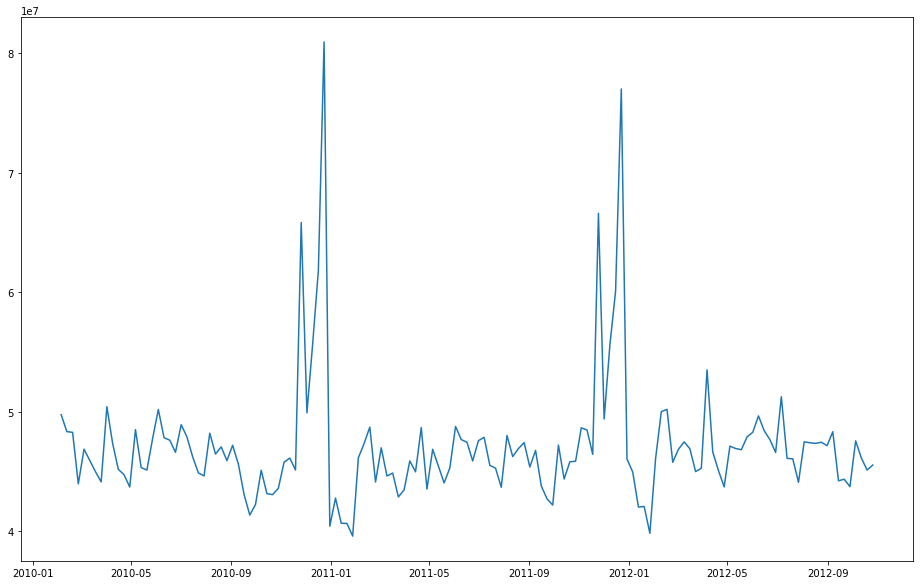

In [20]:
plt.figure(figsize=[16,10])
weekly_sales=data.groupby('Date')['Weekly_Sales'].sum()
plt.plot(weekly_sales)

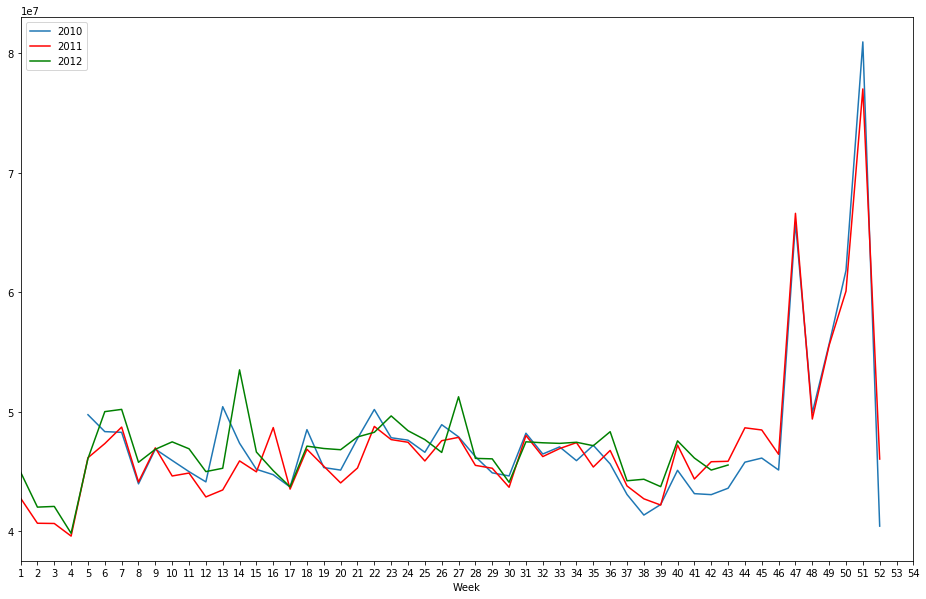

In [21]:
plt.figure(figsize=[16,10])
data[data['Year']==2010].groupby('Week')['Weekly_Sales'].sum().plot()
data[data['Year']==2011].groupby('Week')['Weekly_Sales'].sum().plot(color='red')
data[data['Year']==2012].groupby('Week')['Weekly_Sales'].sum().plot(color='green')
plt.xticks(np.arange(1,55,step=1))
plt.legend(['2010', '2011', '2012'])

### As per instructions : Walmart runs several promotional markdown events throughout the year.These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas

In [22]:
holidaydata=data[data.IsHoliday][['Date','Month','Week','Year']]

In [23]:
holidaydata.drop_duplicates(inplace=True)

In [24]:
holidaydata.reset_index(drop=True,inplace=True)

In [25]:
holidaydata['WeekDay']=holidaydata.Date.dt.weekday_name

In [26]:
holidaydata

,Date,Month,Week,Year,WeekDay
0,2010-11-26,11,47,2010,Friday
1,2010-02-12,2,6,2010,Friday
2,2011-12-30,12,52,2011,Friday
3,2012-02-10,2,6,2012,Friday
4,2010-09-10,9,36,2010,Friday
5,2010-12-31,12,52,2010,Friday
6,2011-09-09,9,36,2011,Friday
7,2011-02-11,2,6,2011,Friday
8,2012-09-07,9,36,2012,Friday
9,2011-11-25,11,47,2011,Friday


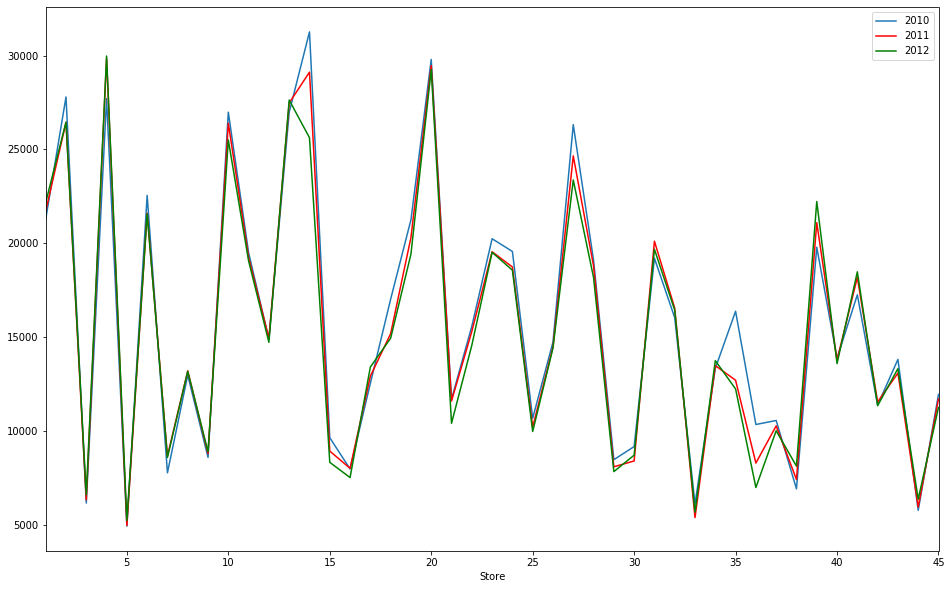

In [27]:
plt.figure(figsize=[16,10])
data[data['Year']==2010].groupby('Store')['Weekly_Sales'].mean().plot()
data[data['Year']==2011].groupby('Store')['Weekly_Sales'].mean().plot(color='red')
data[data['Year']==2012].groupby('Store')['Weekly_Sales'].mean().plot(color='green')
plt.legend(['2010','2011','2012'])

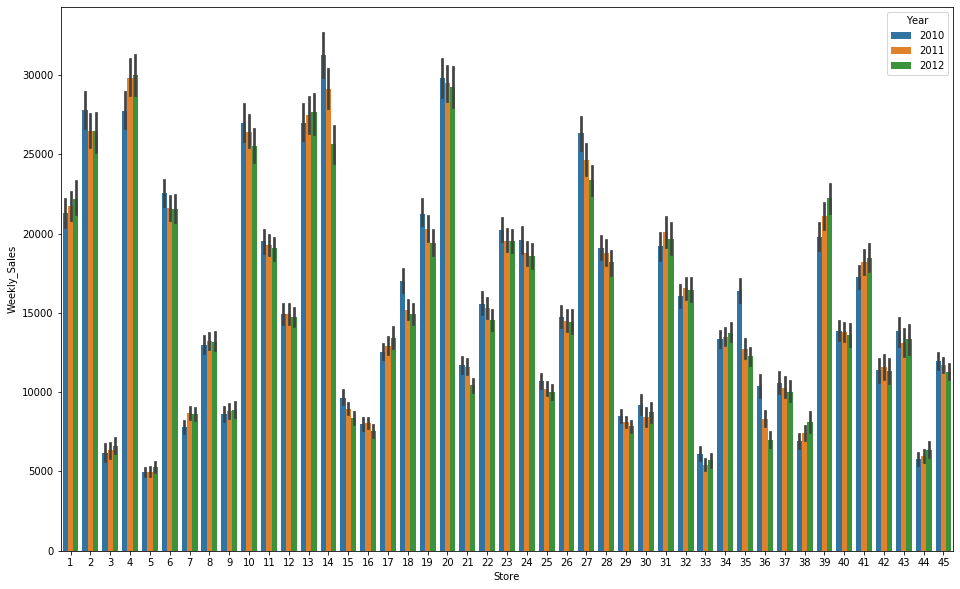

In [28]:
plt.figure(figsize=[16,10])
sns.barplot(x='Store',y='Weekly_Sales',data=data, hue='Year')

### top 3 stores with maximum sale in year 2010 and 2011 are : stores :14,20,4

In [29]:
for i in [2010,2011,2012]:
    sale=data[data['Year']==i].groupby('Store')['Weekly_Sales'].sum()
    sale.nlargest(n=3, keep='all')
    print("top 3 stores with maximum sale in year %d are"  %(i))
    print(sale.nlargest(n=3, keep='all'))
    

top 3 stores with maximum sale in year 2010 are
Store
14    1.054622e+08
20    1.017331e+08
4     9.568047e+07
Name: Weekly_Sales, dtype: float64
top 3 stores with maximum sale in year 2011 are
Store
4     1.110923e+08
20    1.098370e+08
14    1.060963e+08
Name: Weekly_Sales, dtype: float64
top 3 stores with maximum sale in year 2012 are
Store
4     92771189.24
20    89827709.38
13    86707455.02
Name: Weekly_Sales, dtype: float64


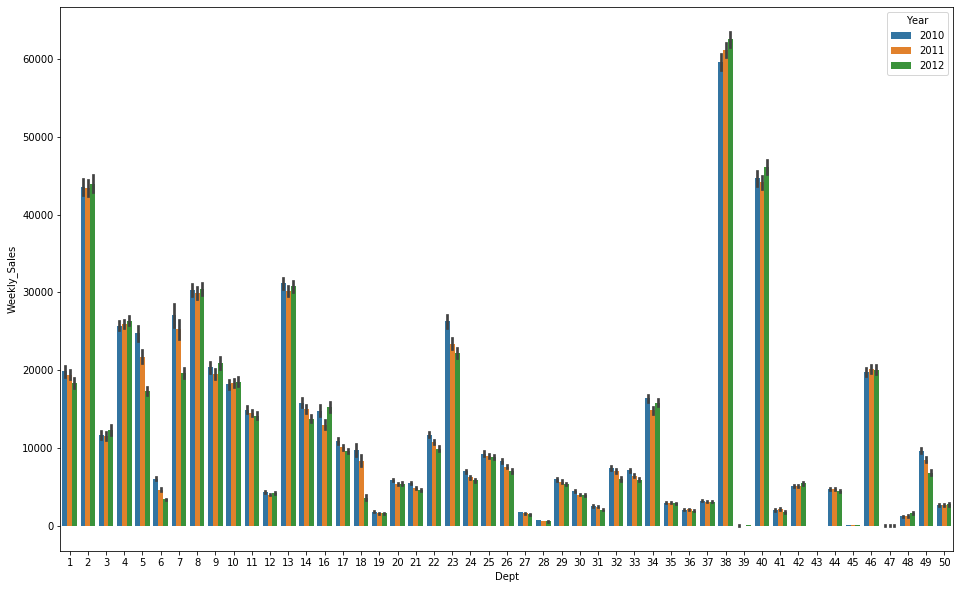

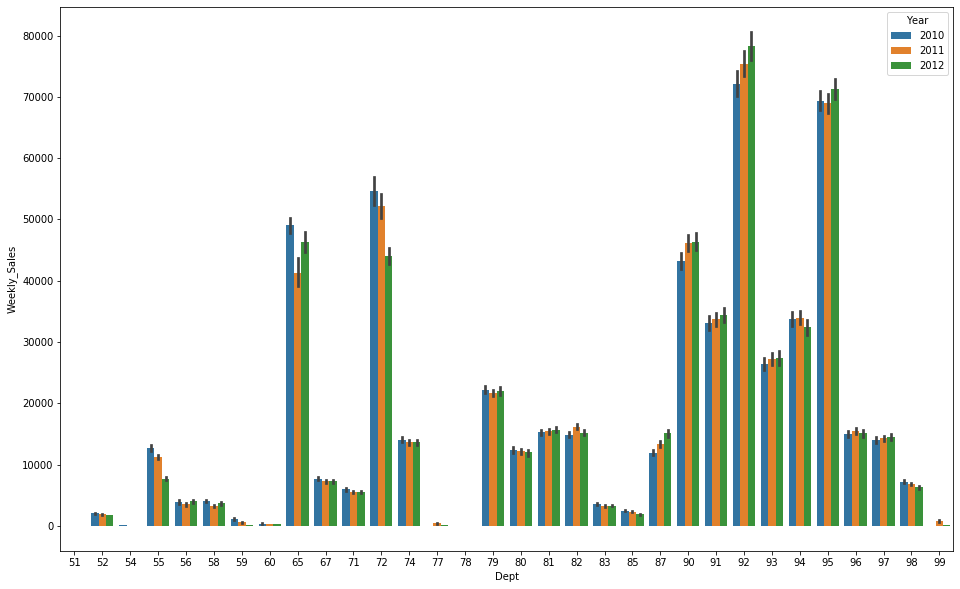

In [30]:
plt.figure(figsize=[16,10])
sns.barplot(x='Dept',y='Weekly_Sales',data=data[data.Dept<51], hue='Year')

plt.figure(figsize=[16,10])
sns.barplot(x='Dept',y='Weekly_Sales',data=data[data.Dept>=51], hue='Year')

In [31]:
for i in [2010,2011,2012]:
    sale=data[data['Year']==i].groupby('Dept')['Weekly_Sales'].sum()
    sale.nlargest(n=3, keep='all')
    print("top 3 stores with maximum sale in year %d are"  %(i))
    print(sale.nlargest(n=3, keep='all'))
    

top 3 stores with maximum sale in year 2010 are
Dept
92    1.558376e+08
95    1.498584e+08
38    1.288553e+08
Name: Weekly_Sales, dtype: float64
top 3 stores with maximum sale in year 2011 are
Dept
92    1.764763e+08
95    1.615699e+08
38    1.432613e+08
Name: Weekly_Sales, dtype: float64
top 3 stores with maximum sale in year 2012 are
Dept
92    1.516294e+08
95    1.378918e+08
38    1.210016e+08
Name: Weekly_Sales, dtype: float64


In [32]:
data.Dept.unique()

array([24,  9, 95, 81, 14, 33, 55,  1, 71, 35, 20, 32, 17, 37,  8, 46, 41,
       22, 49,  4, 23, 97, 11, 12, 10, 93, 19, 90, 21, 72, 26, 52, 94,  2,
       58, 13, 98, 54, 82, 60, 28, 27,  3, 38, 36,  7, 25, 83, 30, 40, 34,
       44, 80, 29, 16, 67, 18, 45, 74, 31, 42, 79, 59, 92,  6, 87, 91, 51,
        5, 96, 56, 85, 47, 50, 48, 99, 77, 78, 65, 39, 43], dtype=int64)

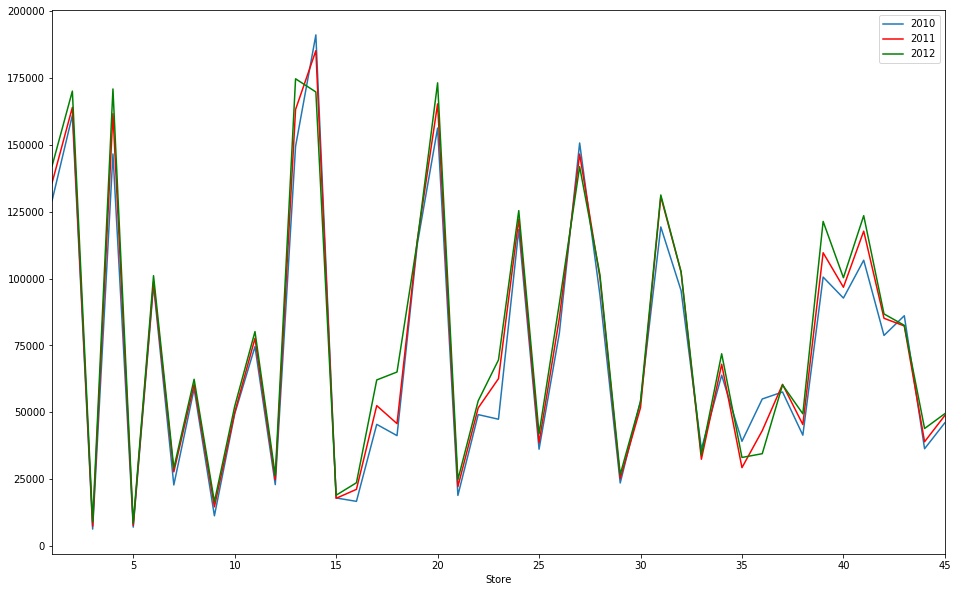

In [33]:
plt.figure(figsize=[16,10])
data[(data.Year==2010) & (data.Dept==92)].groupby('Store')['Weekly_Sales'].mean().plot()
data[(data.Year==2011) & (data.Dept==92)].groupby('Store')['Weekly_Sales'].mean().plot(color='red')
data[(data.Year==2012) & (data.Dept==92)].groupby('Store')['Weekly_Sales'].mean().plot(color='green')
plt.legend(['2010','2011','2012'])

[]

<Figure size 720x432 with 0 Axes>

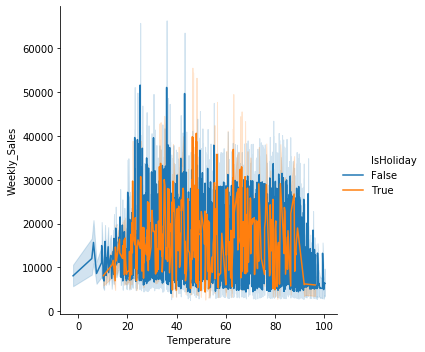

In [34]:
plt.figure(figsize=[10,6])
sns.relplot(y='Weekly_Sales', x='Temperature',hue='IsHoliday', data=data , kind='line' )
plt.plot()

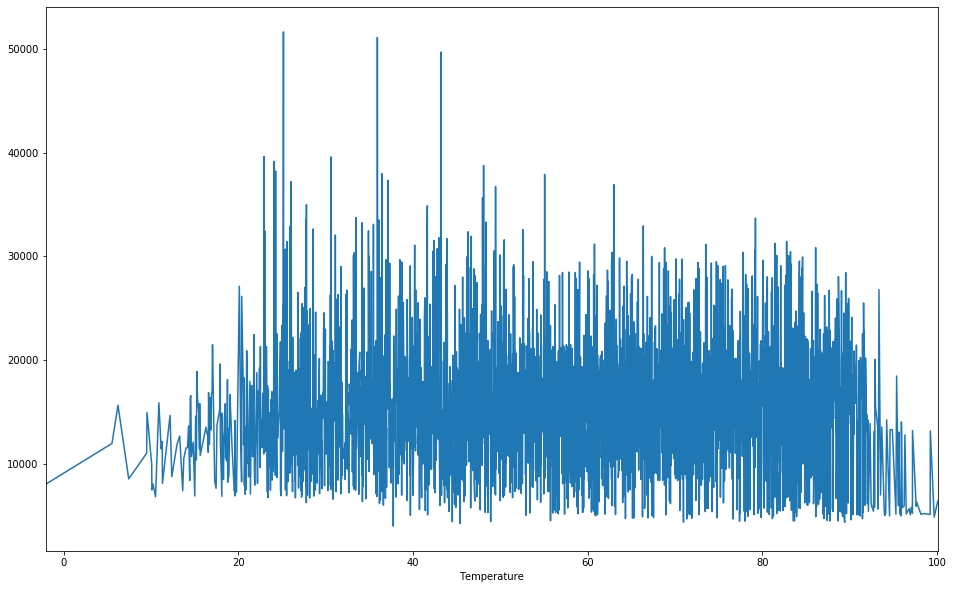

In [35]:
plt.figure(figsize=[16,10])
data.groupby('Temperature')['Weekly_Sales'].mean().plot()

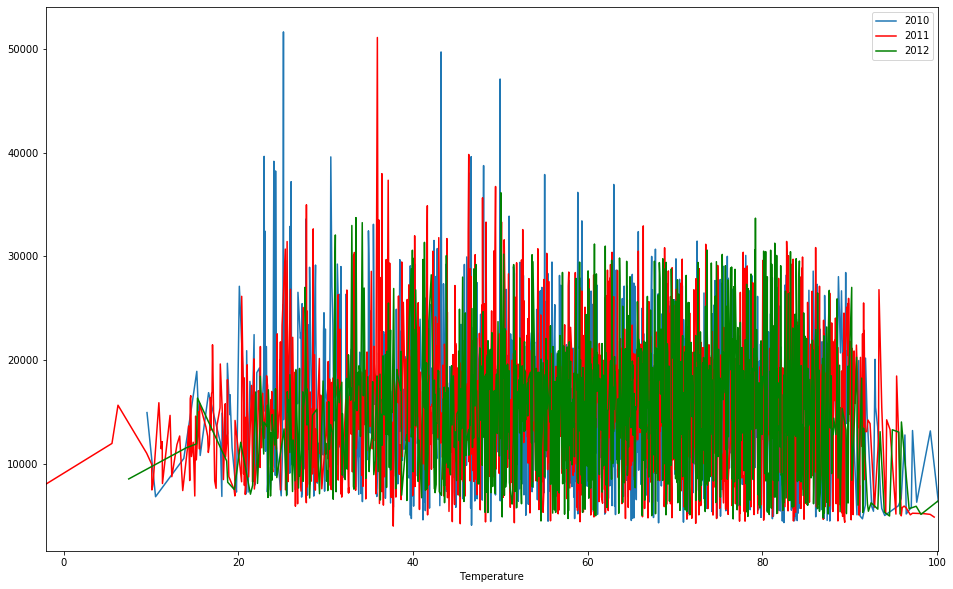

In [36]:
plt.figure(figsize=[16,10])
data[(data.Year==2010)].groupby('Temperature')['Weekly_Sales'].mean().plot()
data[(data.Year==2011)].groupby('Temperature')['Weekly_Sales'].mean().plot(color='red')
data[(data.Year==2012)].groupby('Temperature')['Weekly_Sales'].mean().plot(color='green')
plt.legend(['2010','2011','2012'])

[]

<Figure size 720x432 with 0 Axes>

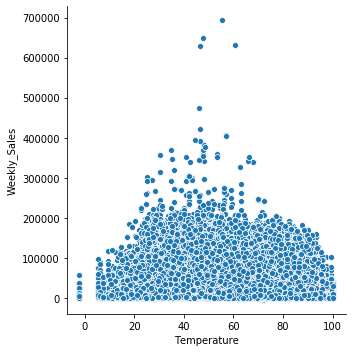

In [37]:
plt.figure(figsize=[10,6])
sns.relplot(y='Weekly_Sales', x='Temperature', data=data )
plt.plot()

[]

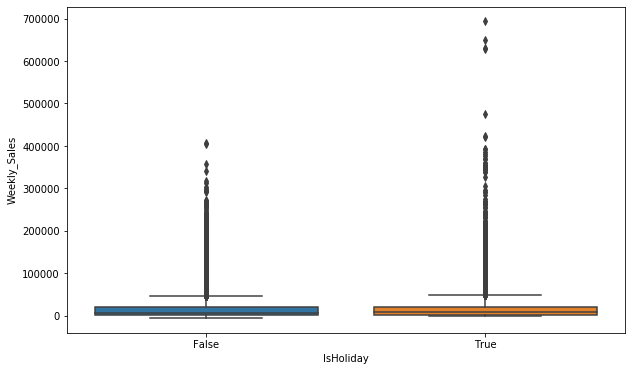

In [38]:
plt.figure(figsize=[10,6])
sns.boxplot(y='Weekly_Sales', x='IsHoliday', data=data )
plt.plot()

[]

<Figure size 720x432 with 0 Axes>

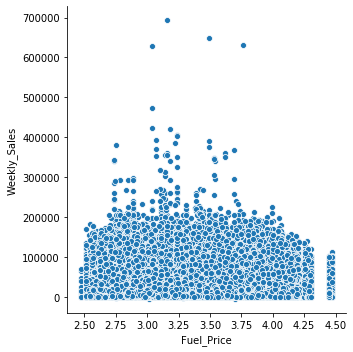

In [39]:
plt.figure(figsize=[10,6])
sns.relplot(y='Weekly_Sales', x='Fuel_Price', data=data )
plt.plot()

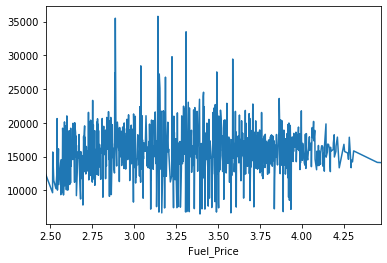

In [40]:
data.groupby('Fuel_Price')['Weekly_Sales'].mean().plot()

[]

<Figure size 720x432 with 0 Axes>

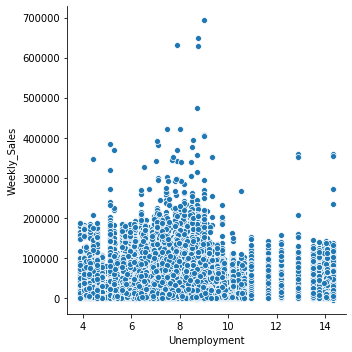

In [41]:
plt.figure(figsize=[10,6])
sns.relplot(y='Weekly_Sales', x='Unemployment', data=data )
plt.plot()

not showing much impact on umemployment

[]

<Figure size 720x432 with 0 Axes>

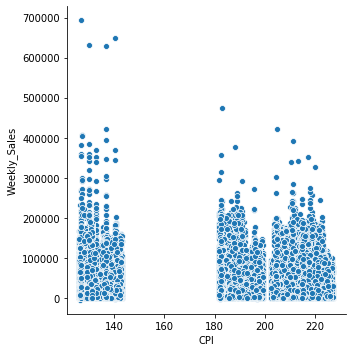

In [42]:
plt.figure(figsize=[10,6])
sns.relplot(y='Weekly_Sales', x='CPI', data=data )
plt.plot()

[]

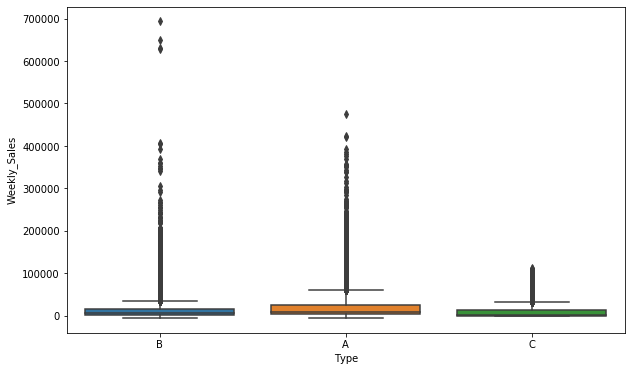

In [43]:
plt.figure(figsize=[10,6])
sns.boxplot(y='Weekly_Sales', x='Type', data=data )
plt.plot()

Type is also helpful in selecting weekly sales median sale for A>B>C
important field as weekly sales can be impacted based on type

[]

<Figure size 720x432 with 0 Axes>

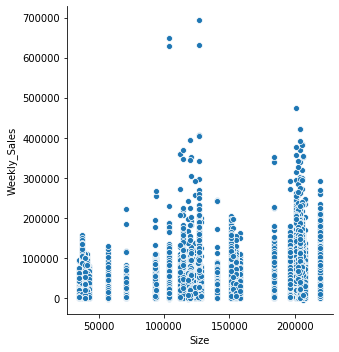

In [44]:
plt.figure(figsize=[10,6])
sns.relplot(y='Weekly_Sales', x='Size', data=data )
plt.plot()

with increase in size weekly sales is increasing so this field is helpfull

In [45]:
data.groupby('Size')['Weekly_Sales'].mean()

Size
34875      5053.415813
37392      6373.033983
39690      8262.936295
39910      8297.715353
41062     13415.114118
42988      8764.237719
57197      7863.224124
70713      8358.766148
93188     12954.393636
93638      8158.810609
103681    13803.596986
112238    14867.308619
114533    19776.180881
118221    11662.897315
119557    15181.218886
120653    15733.313136
123737     9002.493073
125833     8772.890379
126512    26332.303819
128107    10308.157810
140167    11283.435496
151315    21710.543621
152513    14554.129672
155078    13133.014768
155083    13763.632803
158114    13522.081671
184109    21000.763562
196321    17976.004648
200898    28784.851727
202307    26898.070031
202505    21913.243624
203007    16351.621855
203742    29508.301592
203750    19681.907464
203819    19662.881988
204184    24826.984536
205863    29161.210415
206302    18714.889803
207499    19276.762751
219622    27355.136891
Name: Weekly_Sales, dtype: float64

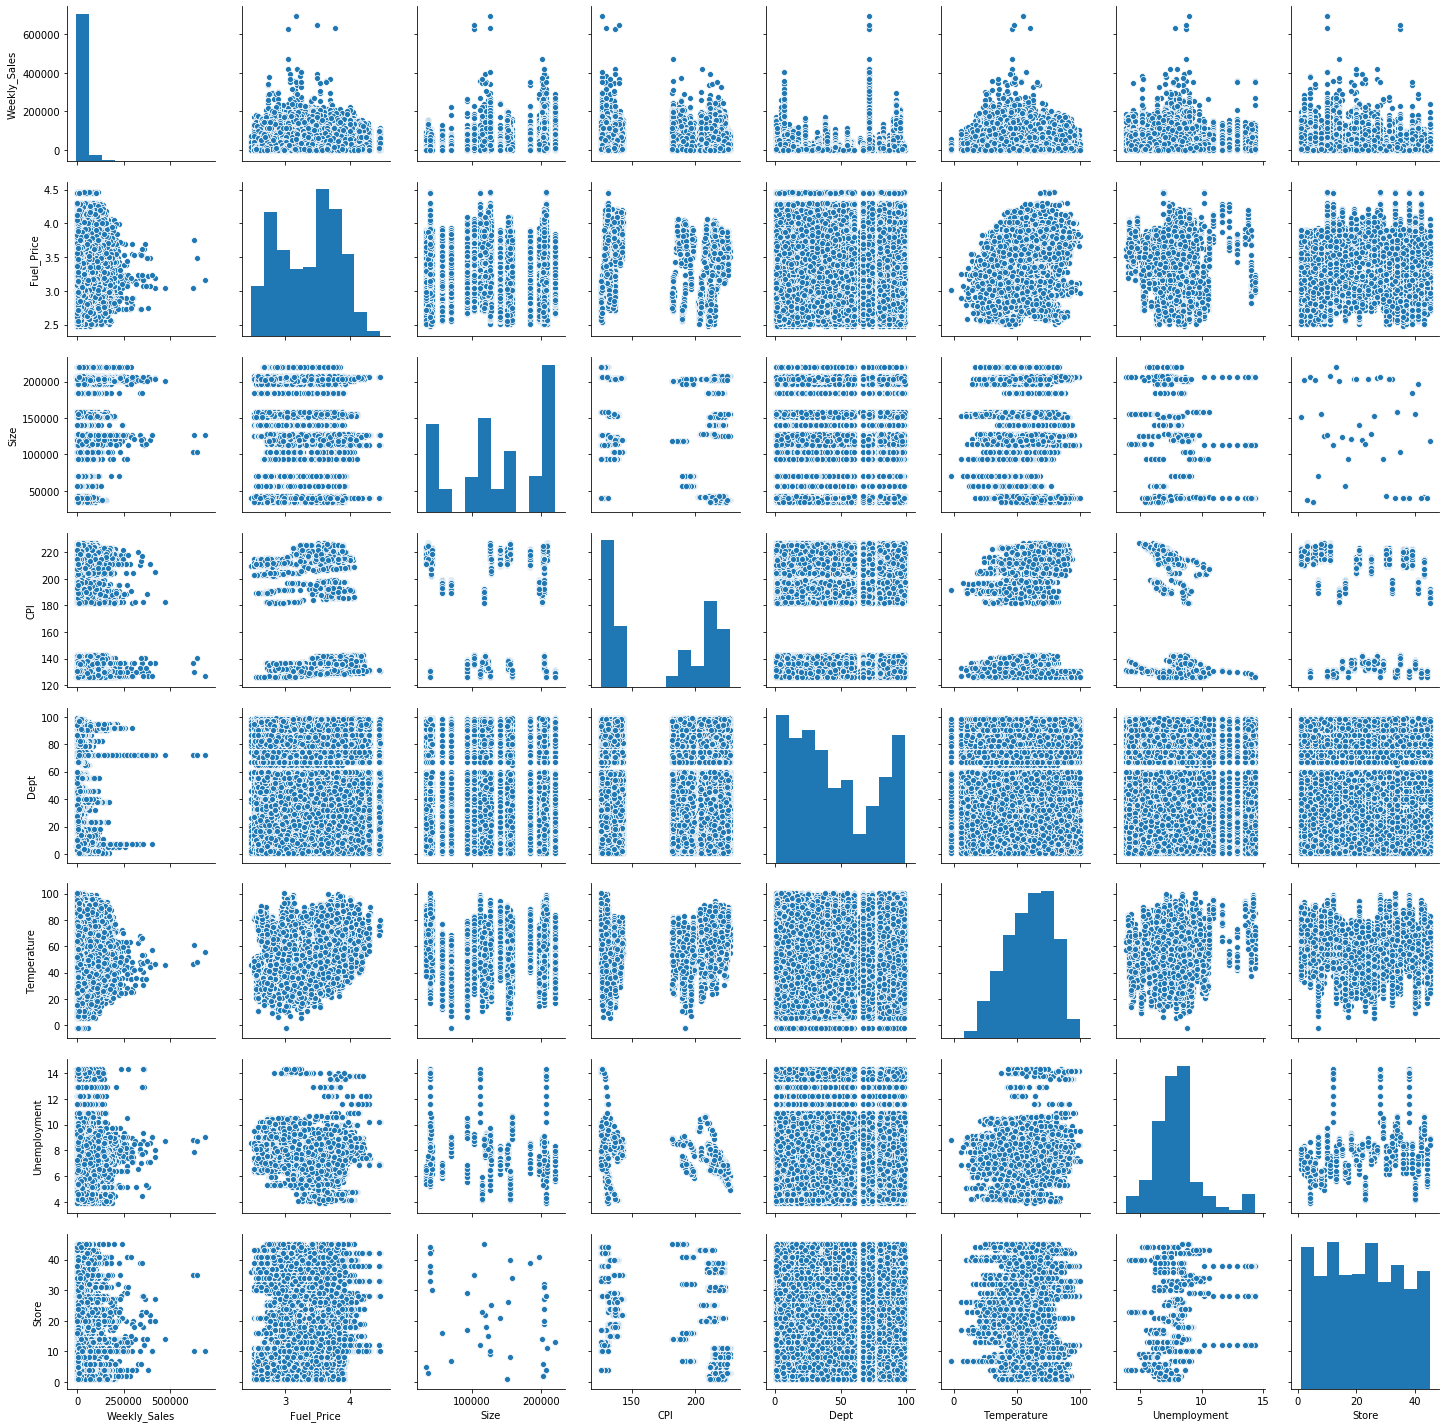

In [46]:
sns.pairplot(data, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment','Store'])

In [47]:
data.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.182881,0.001031,0.001011,0.002997
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.002966,0.000882,0.000904,0.003738
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828,0.027673,0.028409,-0.010111
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,0.000593,0.128184,0.123376,-0.056746
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313,0.236276,0.235983,0.065814
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.003361,-0.031140,-0.040876,0.779633
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.345673,-0.198076,-0.176188,0.141332
MarkDown2,-0.035173,0.000290,0.024130,0.334818,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.108827,-0.000995,-0.005310,-0.222109
MarkDown3,-0.031556,0.001784,0.060385,0.427960,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.048913,0.196307,0.187871,-0.319162
MarkDown4,-0.009941,0.004257,0.045414,-0.000562,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.168196,-0.218477,-0.194865,0.126469


In [48]:
mask =np.zeros_like(data.corr())
indent=np.triu_indices_from(mask)
mask[indent]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1

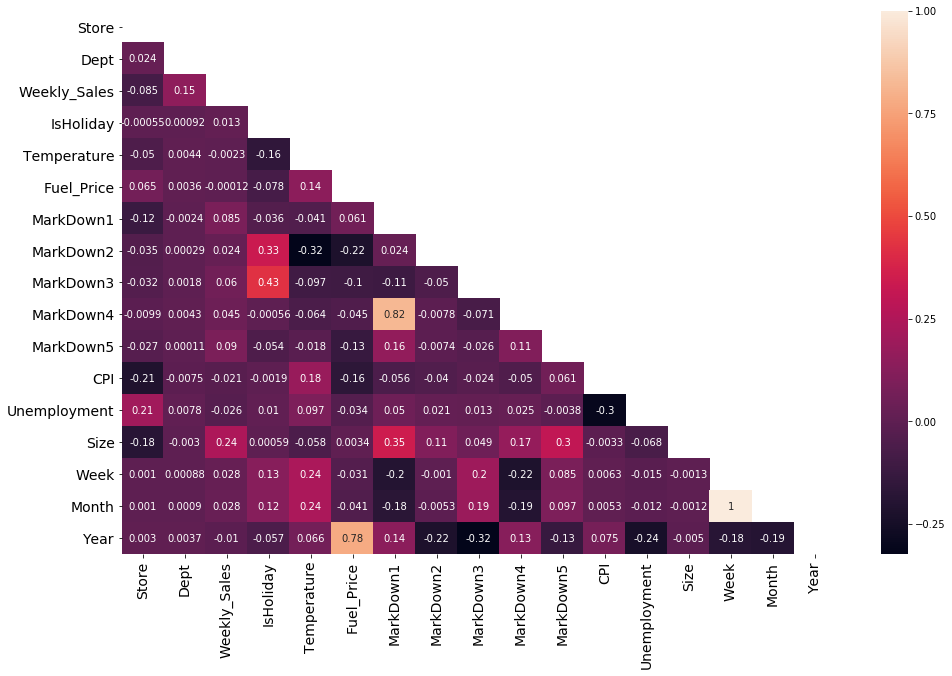

In [49]:
plt.figure(figsize=[16,10])
sns.heatmap(data.corr(),annot=True,mask=mask, annot_kws={"size":10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

features to which we need to test if required or not :
Store
Dept
Date
Weekly_Sales
IsHoliday
Temperature
Fuel_Price
MarkDown1
MarkDown2
MarkDown3
MarkDown4
MarkDown5
CPI
Unemployment
Type
Size
Week
Month
Year


required : 
Store Dept Date Weekly_Sales IsHoliday Week Month Year Type

Fuel_Price is strong correlated to Year and we can see that all years have almost same sales it depends on the month and week so lets keep that and remove year and fuel

so we can drop CPI, Temperature,	Fuel_Price , Unemployment



#### checking MarkDown1	MarkDown2	MarkDown3	MarkDown4	MarkDown5


In [50]:
data.MarkDown1.isnull().value_counts()

True     270889
False    150681
Name: MarkDown1, dtype: int64

In [51]:
data.MarkDown2.isnull().value_counts()

True     310322
False    111248
Name: MarkDown2, dtype: int64

In [52]:
data.MarkDown3.isnull().value_counts()

True     284479
False    137091
Name: MarkDown3, dtype: int64

In [53]:
data.MarkDown4.isnull().value_counts()

True     286603
False    134967
Name: MarkDown4, dtype: int64

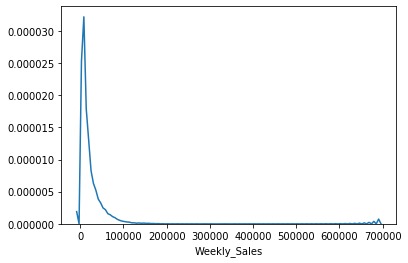

In [54]:
sns.distplot(data['Weekly_Sales'],hist=False)

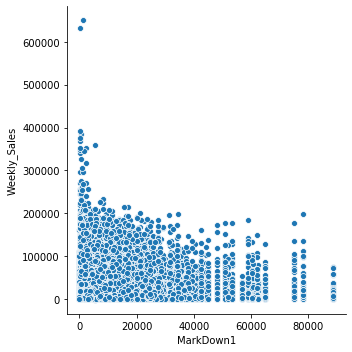

In [55]:

sns.relplot(y='Weekly_Sales', x='MarkDown1', data=data )



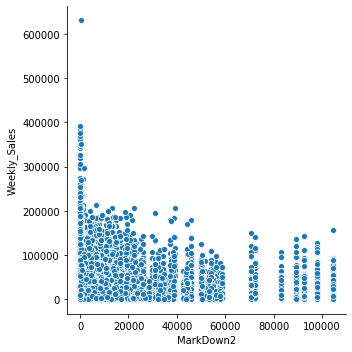

In [56]:

sns.relplot(y='Weekly_Sales', x='MarkDown2', data=data )


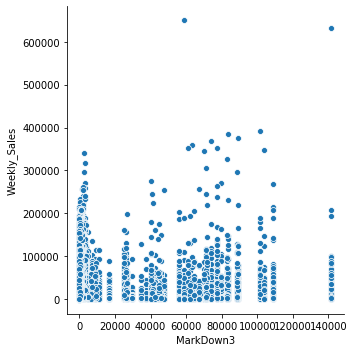

In [57]:

sns.relplot(y='Weekly_Sales', x='MarkDown3', data=data )


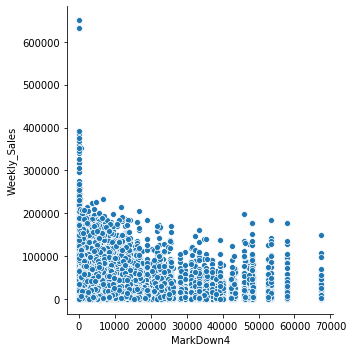

In [58]:

sns.relplot(y='Weekly_Sales', x='MarkDown4', data=data )


C:\Users\Sukhmeet\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Sukhmeet\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


[]

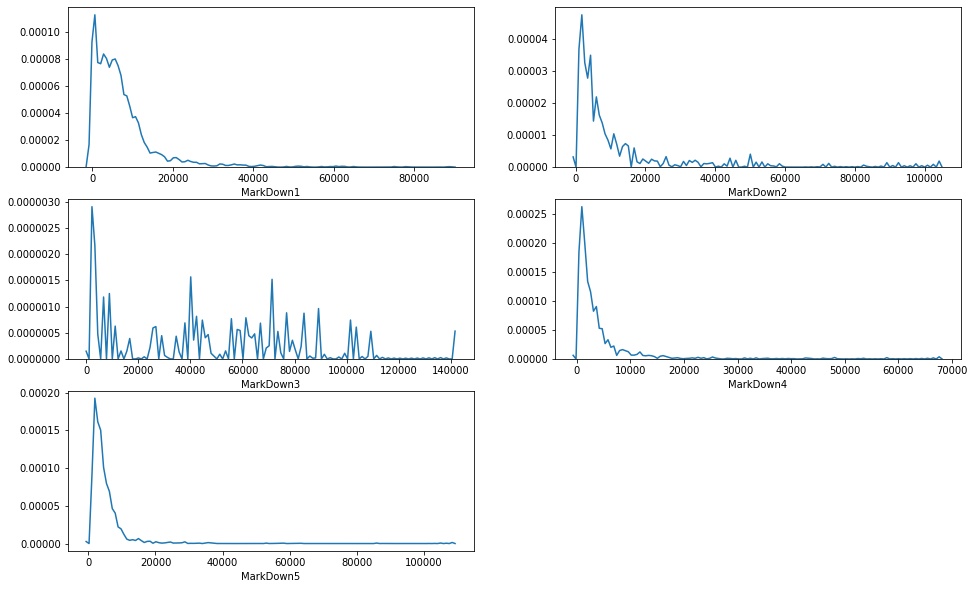

In [59]:
plt.figure(figsize=[16,10])
plt.subplot(3,2,1)
sns.distplot(data['MarkDown1'],hist=False)
plt.subplot(3,2,2)
sns.distplot(data['MarkDown2'],hist=False)
plt.subplot(3,2,3)
sns.distplot(data['MarkDown3'],hist=False)
plt.subplot(3,2,4)
sns.distplot(data['MarkDown4'],hist=False)
plt.subplot(3,2,5)
sns.distplot(data['MarkDown5'],hist=False)
plt.plot()


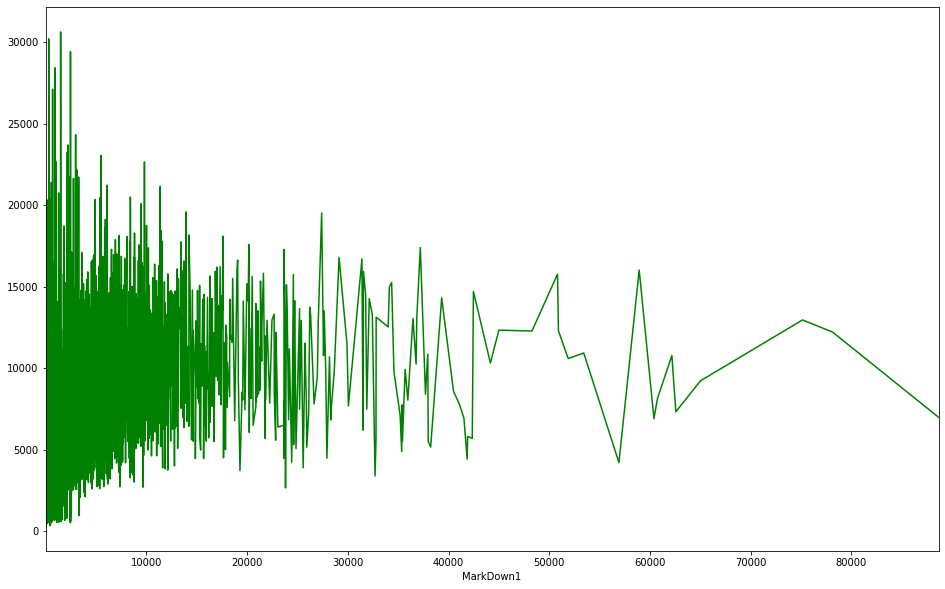

In [60]:
plt.figure(figsize=[16,10])
data.groupby('MarkDown1')['Weekly_Sales'].median().plot(color='green')

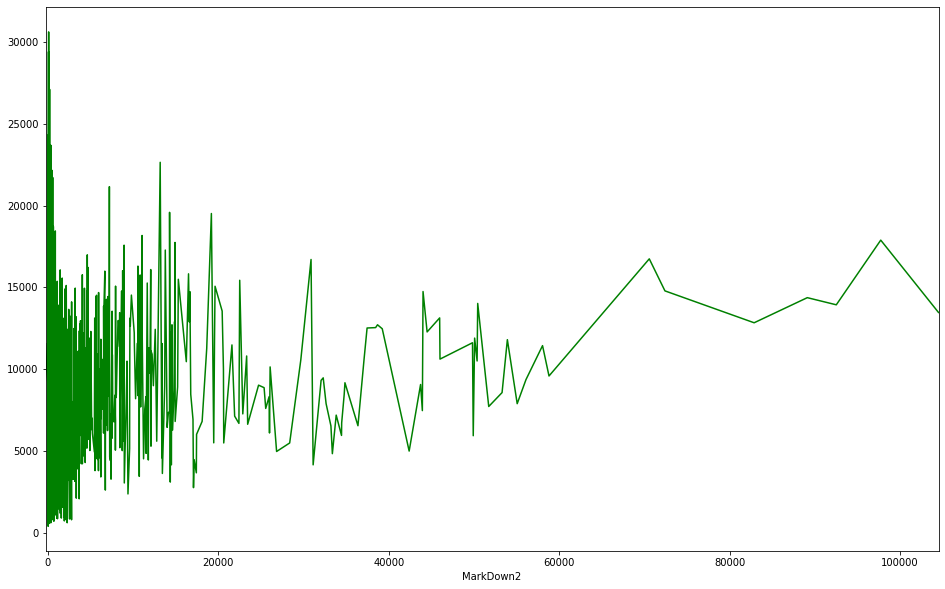

In [61]:
plt.figure(figsize=[16,10])
data.groupby('MarkDown2')['Weekly_Sales'].median().plot(color='green')

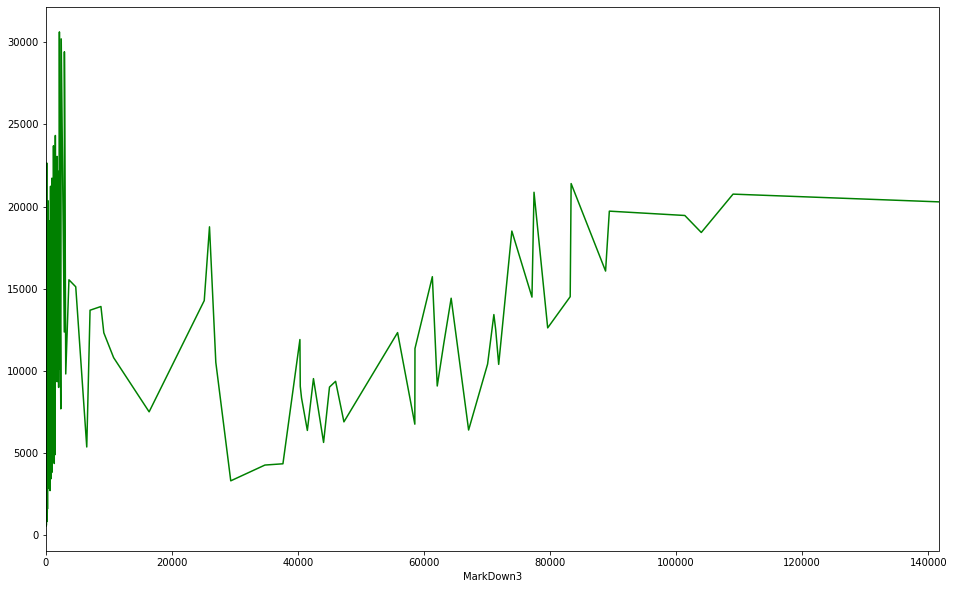

In [62]:
plt.figure(figsize=[16,10])
data.groupby('MarkDown3')['Weekly_Sales'].median().plot(color='green')

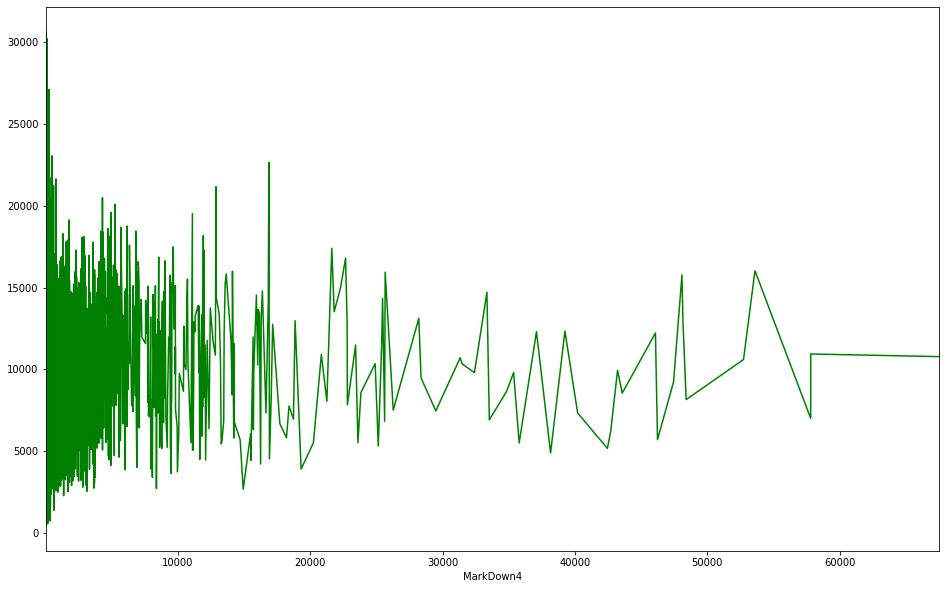

In [63]:
plt.figure(figsize=[16,10])
data.groupby('MarkDown4')['Weekly_Sales'].median().plot(color='green')

#### we have around 50% data values null also the correlation is very low so if we can try remove and check for first time and check for accuracy if we achieve or not

In [64]:
data=data.drop(['Temperature','Date','Unemployment','CPI','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Year'],axis=1)

In [65]:
data['IsHoliday']=np.where(data['IsHoliday'],1,0)

In [66]:
data=pd.get_dummies(data)

In [67]:
data

,Store,Dept,Weekly_Sales,IsHoliday,Size,Week,Month,Type_A,Type_B,Type_C
338702,35,24,9147.55,0,103681,20,5,0,1,0
100778,11,9,19206.71,1,207499,47,11,1,0,0
154997,16,95,28502.96,0,57197,7,2,0,1,0
250646,26,81,17374.06,0,152513,7,2,1,0,0
404777,44,14,470.02,0,39910,5,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...
328961,34,46,16810.51,0,158114,18,5,1,0,0
40302,5,6,1722.03,0,34875,13,4,0,1,0
78063,8,32,4411.45,0,155078,35,8,1,0,0
276561,28,33,8114.87,1,206302,36,9,1,0,0


In [68]:
X=data[['Store','Dept','IsHoliday','Size','Week','Type_A','Type_B','Type_C']]

In [69]:
X

,Store,Dept,IsHoliday,Size,Week,Type_A,Type_B,Type_C
338702,35,24,0,103681,20,0,1,0
100778,11,9,1,207499,47,1,0,0
154997,16,95,0,57197,7,0,1,0
250646,26,81,0,152513,7,1,0,0
404777,44,14,0,39910,5,0,0,1
...,...,...,...,...,...,...,...,...
328961,34,46,0,158114,18,1,0,0
40302,5,6,0,34875,13,0,1,0
78063,8,32,0,155078,35,1,0,0
276561,28,33,1,206302,36,1,0,0


In [70]:
y=data['Weekly_Sales']

In [71]:
y

338702     9147.55
100778    19206.71
154997    28502.96
250646    17374.06
404777      470.02
            ...   
328961    16810.51
40302      1722.03
78063      4411.45
276561     8114.87
359484      426.24
Name: Weekly_Sales, Length: 421570, dtype: float64

## Applying Scaling and Normalization to get good results

In [72]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled,columns=['Store','Dept','IsHoliday','Size','Week','Type_A','Type_B','Type_C'])

In [73]:
X_scaled

,Store,Dept,IsHoliday,Size,Week,Type_A,Type_B,Type_C
0,1.001108,-0.664447,-0.275106,-0.541926,-0.411731,-1.022518,1.256379,-0.335263
1,-0.876050,-1.156379,3.634961,1.160552,1.496144,0.977978,-0.795938,-0.335263
2,-0.484975,1.664032,-0.275106,-1.304202,-1.330337,-1.022518,1.256379,-0.335263
3,0.297174,1.204895,-0.275106,0.258855,-1.330337,0.977978,-0.795938,-0.335263
4,1.705043,-0.992401,-0.275106,-1.587686,-1.471661,-1.022518,-0.795938,2.982735
...,...,...,...,...,...,...,...,...
421565,0.922894,0.057054,-0.275106,0.350704,-0.553055,0.977978,-0.795938,-0.335263
421566,-1.345340,-1.254765,-0.275106,-1.670254,-0.906365,-1.022518,1.256379,-0.335263
421567,-1.110695,-0.402083,-0.275106,0.300917,0.648200,0.977978,-0.795938,-0.335263
421568,0.453604,-0.369287,3.634961,1.140923,0.718862,0.977978,-0.795938,-0.335263


In [74]:
X_train, X_test , y_train , y_test = train_test_split(X_scaled,y,test_size=0.25 , random_state=10)

In [75]:
X_train.shape

(316177, 8)

In [76]:
X_test.shape

(105393, 8)

In [77]:
y_train.shape

(316177,)